In [1]:
!pip install torchsummary

In [2]:
pip install scikit-learn


                                              0.0/8.3 MB ? eta -:--:--
     --                                       0.5/8.3 MB 9.6 MB/s eta 0:00:01
     ---                                      0.8/8.3 MB 8.0 MB/s eta 0:00:01
     ----                                     0.9/8.3 MB 7.1 MB/s eta 0:00:02
     -----                                    1.1/8.3 MB 5.9 MB/s eta 0:00:02
     ------                                   1.3/8.3 MB 5.4 MB/s eta 0:00:02
     -------                                  1.5/8.3 MB 5.2 MB/s eta 0:00:02
     -------                                  1.6/8.3 MB 4.9 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 

In [3]:
!pip install Pillow
!pip install matplotlib
!pip install torchvision

                                              0.0/2.5 MB ? eta -:--:--
                                              0.0/2.5 MB 653.6 kB/s eta 0:00:04
     --                                       0.1/2.5 MB 1.4 MB/s eta 0:00:02
     ---                                      0.2/2.5 MB 1.8 MB/s eta 0:00:02
     ------                                   0.4/2.5 MB 2.0 MB/s eta 0:00:02
     --------                                 0.5/2.5 MB 2.1 MB/s eta 0:00:01
     -----------                              0.7/2.5 MB 2.5 MB/s eta 0:00:01
     --------------                           0.9/2.5 MB 2.6 MB/s eta 0:00:01
     ----------------                         1.1/2.5 MB 2.8 MB/s eta 0:00:01
     -------------------                      1.2/2.5 MB 2.9 MB/s eta 0:00:01
     ----------------------                   1.4/2.5 MB 3.0 MB/s eta 0:00:01
     -------------------------                1.6/2.5 MB 3.1 MB/s eta 0:00:01
     ----------------------------             1.8/2.5 MB 3.2 MB/s eta

In [6]:
!pip install numpy
!pip install pandas
!pip install tqdm

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


In [12]:
import torch
import numpy as np
from PIL import Image
import pathlib
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models
from torchsummary import summary
from sklearn.metrics import classification_report


num_epochs = 3
print(torch.__version__)
print(torch.cuda.is_available())

2.0.0+cpu
False


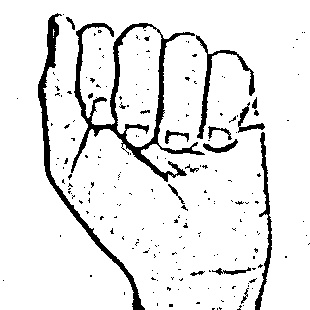

In [13]:
img = Image.open('./cwl/A/1.jpg')
img

In [14]:
img_array = np.asarray(img)

# Print array shape
print(img_array.shape)

(310, 310)


In [16]:

Image_dirs = './cwl'
data_dir   = pathlib.Path(Image_dirs)

# List of all files in the directory and its subdirectories
image_path = list(data_dir.glob('*/*.jpg'))

# total number of image files
image_count = len(image_path)

# Unique labels
Labels = list(set(p.parent.name for p in image_path))
print('Labels :',sorted(Labels))
num_labels = len(Labels)

# Print the results
print(f"Found {image_count} images in {num_labels} unique labels")

Labels : ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Found 12845 images in 27 unique labels


In [17]:
transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to 128x128 pixels
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),   # Rotate the image randomly up to 30 degrees
    transforms.RandomAffine(degrees=0, shear=45),   # Apply affine transformation with shear up to 30 degrees
    transforms.ToTensor(),    # Convert the image to a tensor
#     transforms.Normalize(mean=[0.5, 0.5, 0.5],
#                          std=[0.5, 0.5, 0.5])  # Normalize the pixel values
])


# ImageFolder dataset for the full dataset
full_dataset = datasets.ImageFolder(Image_dirs, transform=transforms)

# Split the dataset into training and testing sets
train_size = int(0.75 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = data.random_split(full_dataset, [train_size, test_size])

# Print the number of images in each set
print(f"Found {len(train_dataset)} images in the training set")
print(f"Found {len(test_dataset)} images in the testing set")


Found 9633 images in the training set
Found 3212 images in the testing set


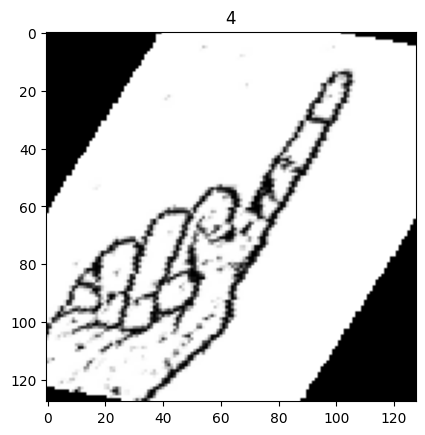

(128, 128, 3)

In [18]:
index = 7
img, label = train_dataset[index]
# Convert the PyTorch tensor to a NumPy array
img = img.numpy().transpose((1, 2, 0))
plt.title(label)
plt.imshow(img)
plt.show()
img.shape

In [30]:
class Sign_Language(nn.Module):
    def __init__(self):
        super(Sign_Language, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, 35)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(-1, 128 * 16 * 16)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model = Sign_Language()

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU if available
model.to(device)
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
         MaxPool2d-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          18,496
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
         MaxPool2d-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,856
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
        MaxPool2d-12          [-1, 128, 16, 16]               0
           Linear-13                  [-1, 512]      16,777,728
             ReLU-14                  [

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True) 

In [34]:
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    
    # Set the model to training mode
    model.train()
    
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        train_loss += loss.item() * images.size(0)
        Max_val, pred_max_label =torch.max(outputs.data, 1)

     
        train_acc += (pred_max_label == labels).sum().item()            

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    
    # Evaluate the model on the test set
    test_loss = 0.0
    test_acc = 0.0
    
    # Set the model to evaluation mode
    model.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            # Move the data to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Update the test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_acc += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)
    
    # Print the epoch statistics
    print("Epoch {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}".format(
        epoch+1,
        train_loss, 
        train_acc, 
        test_loss, 
        test_acc))

KeyboardInterrupt: 

In [36]:
model.eval()

# Get the predicted labels and true labels for the test set
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted and true labels to the lists
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

KeyboardInterrupt: 

In [37]:
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

# Generate the classification report
target_names = [Labels_index[i] for i in range(len(Labels))]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           A       0.00      0.00      0.00       121
           B       0.00      0.00      0.00       115
           C       0.00      0.00      0.00       112
           D       0.00      0.00      0.00       111
           E       0.00      0.00      0.00        95
           F       0.00      0.00      0.00        94
           G       0.00      0.00      0.00        86
           H       0.00      0.00      0.00       105
           I       0.00      0.00      0.00       108
           J       0.00      0.00      0.00       122
           K       0.00      0.00      0.00       102
           L       0.00      0.00      0.00        99
           M       0.00      0.00      0.00       120
           N       0.00      0.00      0.00        96
           O       0.00      0.00      0.00       112
           P       0.00      0.00      0.00        96
           Q       0.00    

c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [26]:
model_file = 'mymodel.pt'

# Save the model
torch.save(model, model_file)

In [27]:
path = "./mymodel.pt"

# Load the model
Model = torch.load(path)
Model.to(device)

Sign_Language(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=35,

torch.Size([1, 1, 128, 128])


RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[1, 1, 128, 128] to have 3 channels, but got 1 channels instead

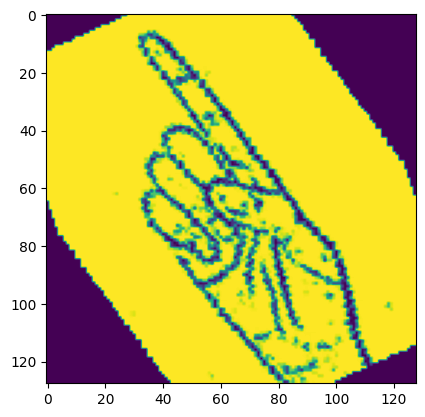

In [39]:
img_path = './cwl/D/0.jpg'
img = Image.open(img_path)
# Apply the transform to the image
img = transforms(img)
plt.imshow(img.permute(1, 2, 0))
img = img.to(device).unsqueeze(0)  # add batch dimension
print(img.shape)

# Pass the transformed image to the model
output = Model(img)
Max_val, label =torch.max(output.data, 1)
# Reverse the dictionary
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

plt.title('Actuel : {}\nPredicted :{}'.format(img_path.split('/')[-2],
                                       Labels_index[label.item()]))
plt.show()

In [50]:
import cv2

# Initialize webcam
cap = cv2.VideoCapture(0)

# Define kernel size for Gaussian blur filter
kernel_size = (5, 5)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection to detect boundaries
    edges = cv2.Canny(gray, 100, 200)
    
    # Apply Gaussian blur filter to smooth the edges
    blurred = cv2.GaussianBlur(edges, kernel_size, 0)
    
    # Display the original frame and the processed frame
    cv2.imshow("Original", frame)
    cv2.imshow("Processed", blurred)
    
    # Exit the loop if 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all windows
cap.release()
cv2.destroyAllWindows()


ValueError: could not broadcast input array from shape (200,200) into shape (200,200,3)

In [53]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import cv2

# Initialize webcam
cap = cv2.VideoCapture(0)

# Define minimum threshold value
minValue = 150

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur filter to smooth the edges
    blur = cv2.GaussianBlur(gray, (5, 5), 2)
    
    # Apply adaptive thresholding to detect edges
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Apply Otsu's thresholding to convert background to white
    ret, thresh = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Apply erosion to remove noise and dilation to make sign thicker
    kernel = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(thresh, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    
    # Display the original frame and the processed frame
    cv2.imshow("Original", frame)
    cv2.imshow("Processed", dilation)
    
    # Exit the loop if 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all windows
cap.release()
cv2.destroyAllWindows()


In [31]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [54]:
# Load the pre-trained ResNet50 model
Resnet50 = models.resnet50(pretrained=True)

# Freeze all parameters in the model
for param in Resnet50.parameters():
    param.requires_grad = False

# Replace the final layer with a new, untrained linear layer
num_features = Resnet50.fc.in_features
Resnet50.fc = torch.nn.Linear(num_features, 35)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Resnet50.parameters(), lr=0.001)

# Set the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Resnet50 = Resnet50.to(device)
summary(Resnet50,(3,128,128))

c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\ashub/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]           4,096
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          16,384
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

In [55]:
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    
    # Set the model to training mode
    Resnet50.train()
    
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = Resnet50(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        train_loss += loss.item() * images.size(0)
        Max_val, pred_max_label =torch.max(outputs.data, 1)

     
        train_acc += (pred_max_label == labels).sum().item()            

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    
    # Evaluate the model on the test set
    test_loss = 0.0
    test_acc = 0.0
    
    # Set the model to evaluation mode
    Resnet50.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            # Move the data to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = Resnet50(images)
            loss = criterion(outputs, labels)
            
            # Update the test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_acc += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)
    
    # Print the epoch statistics
    print("Epoch {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}".format(
        epoch+1,
        train_loss, 
        train_acc, 
        test_loss, 
        test_acc)) 

Epoch 1, Train Loss: 0.2739, Train Acc: 0.9613, Test Loss: 0.0426, Test Acc: 0.9940
Epoch 2, Train Loss: 0.0364, Train Acc: 0.9950, Test Loss: 0.0192, Test Acc: 0.9973
Epoch 3, Train Loss: 0.0219, Train Acc: 0.9963, Test Loss: 0.0125, Test Acc: 0.9983


In [56]:
Resnet50.eval()

# Get the predicted labels and true labels for the test set
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = Resnet50(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted and true labels to the lists
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [57]:
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

# Generate the classification report
target_names = [Labels_index[i] for i in range(len(Labels))]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       315
           2       1.00      1.00      1.00       318
           3       1.00      1.00      1.00       315
           4       1.00      1.00      1.00       300
           5       0.99      1.00      1.00       293
           6       1.00      1.00      1.00       296
           7       1.00      1.00      1.00       300
           8       1.00      1.00      1.00       327
           9       1.00      1.00      1.00       291
           A       1.00      1.00      1.00       313
           B       1.00      1.00      1.00       278
           C       0.99      1.00      1.00       285
           D       1.00      0.99      1.00       323
           E       1.00      1.00      1.00       307
           F       1.00      1.00      1.00       284
           G       1.00      1.00      1.00       302
           H       1.00      1.00      1.00       285
           I       1.00    

In [58]:
# Define the model file path
model_file = 'Resnet50.pt'

# Save the model
torch.save(Resnet50, model_file)

In [59]:
path = "./Resnet50.pt"

# Load the model
Resnet = torch.load(path)
Resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

torch.Size([1, 3, 128, 128])


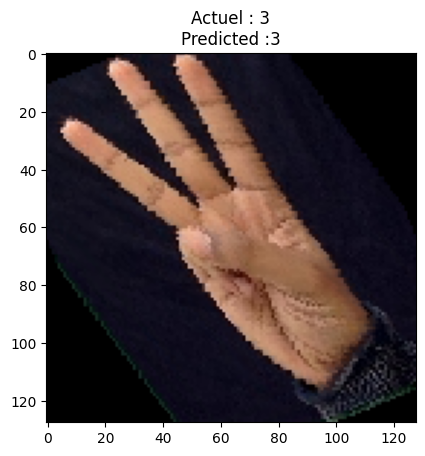

In [67]:
img_path = './Sign Language images/3/23.jpg'
img = Image.open(img_path)
# Apply the transform to the image
img = transforms(img)
plt.imshow(img.permute(1, 2, 0))
img = img.to(device).unsqueeze(0)  # add batch dimension
print(img.shape)

# Pass the transformed image to the model
output = Resnet(img)
Max_val, label =torch.max(output.data, 1)
# Reverse the dictionary
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

plt.title('Actuel : {}\nPredicted :{}'.format(img_path.split('/')[-2],
                                       Labels_index[label.item()]))
plt.show()

In [68]:
import cv2
import numpy as np
import torch

# Load the pre-trained ResNet50 model
model = torch.load('Resnet50.pt', map_location=torch.device('cpu'))
model.eval()

# Define the function to preprocess the input image
def preprocess_image(frame):
    # Resize the image to (128, 128) and convert it to RGB format
    resized = cv2.resize(frame, (128, 128))
    resized = np.transpose(resized, (2, 0, 1))
    resized = np.expand_dims(resized, axis=0)
    resized = resized.astype(np.float32)
    return resized

# Define the function to predict the sign label from the input image
def predict_sign(image):
    # Preprocess the input image
    preprocessed_image = preprocess_image(image)

    # Perform the prediction using the pre-trained model
    with torch.no_grad():
        inputs = torch.from_numpy(preprocessed_image)
        outputs = model(inputs)
        prediction_p = torch.nn.functional.softmax(outputs, dim=1)
        yhat = np.argmax(prediction_p.cpu().numpy())

    # Return the predicted sign label
    if yhat < 10:
        return chr(yhat + 48)
    return chr(yhat + 55)

# Open the webcam
cap = cv2.VideoCapture(0)

# Define the green box in the frame
start_point = (425, 100)
end_point = (625, 300)
color = (0, 255, 0)
thickness = 2

while True:
    # Read the frame from the webcam
    ret, frame = cap.read()

    # Draw the green box in the frame
    frame = cv2.rectangle(frame, start_point, end_point, color, thickness)

    # Extract the image from the green box
    image = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]

    # Check if the image is not empty
    if image.size != 0:
        # Predict the sign label from the image
        sign = predict_sign(image)

        # Display the predicted sign label on the frame
        cv2.putText(frame, sign, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Indian Sign Language Recognition', frame)

    # Stop the program when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
W
---------------------------
K
---------------------------
K
---------------------------
W
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
K
---------------------------
W
---------------------------
K
---------------------------
W
---------------------------
W
---------------------------
K
---------------------------
K
---------------------------
W
--------

In [69]:
Resnet18 = models.resnet18(pretrained=True)

# Replace the last fully connected layer with a new layer with the number of classes in the dataset
num_classes = 35
Resnet18.fc = nn.Linear(512, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Resnet18.parameters(), lr=0.001)

# Set the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Resnet18 = Resnet18.to(device)
summary(Resnet18,(3,128,128))


c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ashub\OneDrive\Desktop\ayush slr\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ashub/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
       BasicBlock-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
             ReLU-14           [-1, 64,

In [70]:
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    
    # Set the model to training mode
    Resnet18.train()
    
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = Resnet18(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        train_loss += loss.item() * images.size(0)
        Max_val, pred_max_label =torch.max(outputs.data, 1)

     
        train_acc += (pred_max_label == labels).sum().item()            

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    
    # Evaluate the model on the test set
    test_loss = 0.0
    test_acc = 0.0
    
    # Set the model to evaluation mode
    Resnet18.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            # Move the data to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = Resnet18(images)
            loss = criterion(outputs, labels)
            
            # Update the test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_acc += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)
    
    # Print the epoch statistics
    print("Epoch {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}".format(
        epoch+1,
        train_loss, 
        train_acc, 
        test_loss, 
        test_acc))

Epoch 1, Train Loss: 0.0701, Train Acc: 0.9828, Test Loss: 0.0272, Test Acc: 0.9935
Epoch 2, Train Loss: 0.0172, Train Acc: 0.9952, Test Loss: 0.0008, Test Acc: 0.9999
Epoch 3, Train Loss: 0.0114, Train Acc: 0.9969, Test Loss: 0.0007, Test Acc: 0.9997


In [71]:
Resnet18.eval()

# Get the predicted labels and true labels for the test set
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = Resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted and true labels to the lists
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [72]:
# Define the model file path
model_file = 'Resnet18.pt'

# Save the model
torch.save(Resnet18, model_file)

In [73]:
path = "./Resnet18.pt"

# Load the model
Resnet_18 = torch.load(path)
Resnet_18 = Resnet_18.to(device)

torch.Size([1, 3, 128, 128])


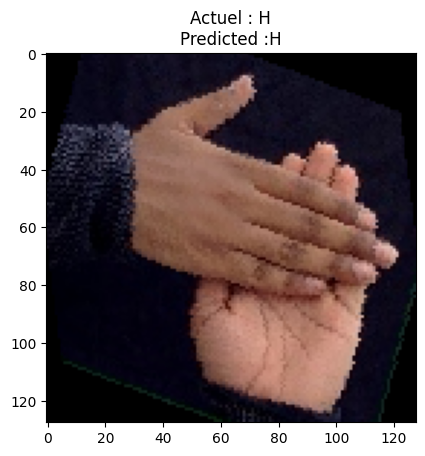

In [75]:
img_path = './Sign Language images/H/0.jpg'

img = Image.open(img_path)
img = transforms(img)
plt.imshow(img.permute(1, 2, 0))
img = img.to(device).unsqueeze(0)  # add batch dimension
print(img.shape)

# Pass the transformed image to the model
output = Resnet_18(img)
Max_val, label =torch.max(output.data, 1)
# Reverse the dictionary
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

plt.title('Actuel : {}\nPredicted :{}'.format(img_path.split('/')[-2],
                                       Labels_index[label.item()]))
plt.show()